# Workshop 6: Nonlinear Equations and Systems

This notebook explores and compares several methods for finding the roots of nonlinear equations and systems. Each section introduces a method or exercise with a brief explanation, followed by the relevant code.

# Implementing the chord, secant, and Newton's methods for finding the roots of nonlinear equations.

## Implemented Methods

We implement the following methods for finding the roots of nonlinear equations:
- Chord method
- Secant method
- Newton's method

In [1]:
# Method Implementations

import numpy as np


def corde(fname, m, x0, nmax=100, tolx=1e-12, tolf=1e-12):
    it = []

    ex = 1 + tolx
    ef = 1 + tolf
    while len(it) < nmax and ef >= tolf and ex >= tolx:
        d = fname(x0) / m
        x1 = x0 - d

        if x1 != 0:
            ex = abs(d) / abs(x1)
        else:
            ex = abs(d)

        ef = abs(fname(x1))
        it.append(x1)
        x0 = x1

    if len(it) == nmax:
        print("Corde : raggiunto massimo numero di iterazioni \n")

    return x1, it


def secanti(fname, xm1, x0, nmax=100, tolx=1e-12, tolf=1e-12):
    it = []

    ex = 1 + tolx
    ef = 1 + tolf
    while len(it) < nmax and ef >= tolf and ex >= tolx:
        d = fname(x0) * (x0 - xm1) / (fname(x0) - fname(xm1))
        x1 = x0 - d

        if x1 != 0:
            ex = abs(d) / abs(x1)
        else:
            ex = abs(d)

        ef = abs(fname(x1))
        it.append(x1)
        xm1 = x0
        x0 = x1

    if len(it) == nmax:
        print("Secanti: raggiunto massimo numero di iterazioni \n")

    return x1, it


def newton(fname, fpname, x0, m=1, nmax=100, tolx=1e-12, tolf=1e-12):
    it = []

    ex = 1 + tolx
    ef = 1 + tolf
    while len(it) < nmax and ef >= tolf and ex >= tolx:
        fx0 = fname(x0)
        if abs(fpname(x0) <= np.spacing(1)):
            return None, None

        d = fx0 / fpname(x0)
        x1 = x0 - m * d

        if x1 != 0:
            ex = abs(d) / abs(x1)
        else:
            ex = abs(d)

        ef = abs(fname(x1))
        it.append(x1)
        x0 = x1

    if len(it) == nmax:
        print("Secanti: raggiunto massimo numero di iterazioni \n")

    return x1, it

## Exercise 1: Compare Methods

Compare all implemented methods (bisection, false position, chord, secant, Newton) for the following cases:
- $f(x) = x^3-6x^2-4x+24$ in $[-3,8]$, tolx = $1\times 10^{-12}$, tolf = $1\times 10^{-12}$ (exact roots: $\alpha=-2,2,6$)
- $f(x) = \exp(-x) - (x + 1)$ in $[-1, 2]$, tolx = $1\times 10^{-12}$, tolf = $1\times 10^{-12}$ (exact root: $\alpha=0$)
- $f(x) = \log_2(x + 3) - 2$ in $[-1, 2]$, tolx = $1\times 10^{-12}$, tolf = $1\times 10^{-12}$ (exact root: $\alpha=1$)
- $f(x) = \sqrt{x} - \frac{x^2}{4}$ in $[1, 3]$, tolx = $1\times 10^{-12}$, tolf = $1\times 10^{-12}$ (exact root: $\alpha=2^{4/3}$)

For each method, plot the error $e_k = |x_k - \alpha|$ using a semilogarithmic scale (semilogy). Also, estimate the order of each method.


In [2]:
import sympy as sym
from sympy import symbols, Matrix, lambdify
import numpy as np
import matplotlib.pyplot as plt
import method.functions as fun

Ordine Bisezione  1.0
Ordine Falsa posizione  1.0001381592601961
Ordine Corde  1.0000045394421324
Ordine Newton  2.010656748046438
Ordine Secanti  1.693295083140531


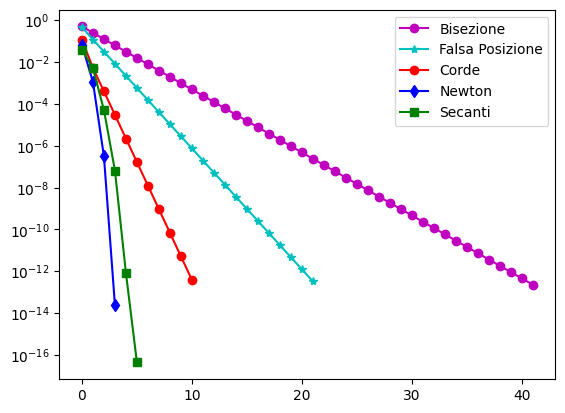

In [3]:
x = sym.symbols("x")
fs = sym.exp(-x) - (x + 1)
dfs = sym.diff(fs, x, 1)
titolo = "exp(-x)-(x+1)"
fp = lambdify(
    x, dfs, np
)  # l'ultimo argomento np (nickaname di numpy) serve per specificare che la lambda function
# può prendere come argomento un numpy array ed eseguire l'operazione su tutte le sue componenti.
f = lambdify(x, fs, np)

alfa = 0
a = -1
b = 2
x0 = -0.5
xm1 = -0.3
tolx = 1e-14
tolf = 1e-14
nmax = 100

x1_b, xk_b, it_b = fun.metodo_bisezione(f, a, b)
print("Ordine Bisezione ", fun.stima_ordine(xk_b, it_b))

x1_f, xk_f, it_f = fun.falsa_posizione(f, a, b)
print("Ordine Falsa posizione ", fun.stima_ordine(xk_f, it_f))

coeff_ang = (f(b) - f(a)) / (b - a)
x1_c, xk_c, it_c = fun.corde(f, coeff_ang, x0)
print("Ordine Corde ", fun.stima_ordine(xk_c, it_c))

x1n, xk_n, it_n = fun.newton(f, fp, x0)
print("Ordine Newton ", fun.stima_ordine(xk_n, it_n))

x1_s, xk_s, it_s = fun.secanti(f, xm1, x0)
print("Ordine Secanti ", fun.stima_ordine(xk_s, it_s))

plt.semilogy(
    range(it_b),
    np.abs(np.array(xk_b) - alfa),
    "mo-",
    range(it_f),
    np.abs(np.array(xk_f) - alfa),
    "c*-",
    range(it_c),
    np.abs(np.array(xk_c) - alfa),
    "ro-",
    range(it_n),
    np.abs(np.array(xk_n) - alfa),
    "db-",
    range(it_s),
    np.abs(np.array(xk_s) - alfa),
    "gs-",
)
plt.legend(["Bisezione", "Falsa Posizione", "Corde", "Newton", "Secanti"])
plt.show()

Corde : raggiunto massimo numero di iterazioni 

Solution corde:  0.585786437626906 Iterates:  100
Solution secanti:  -1.9999999999999996 Iterates:  14
Solution newton:  -2.0 Iterates:  9


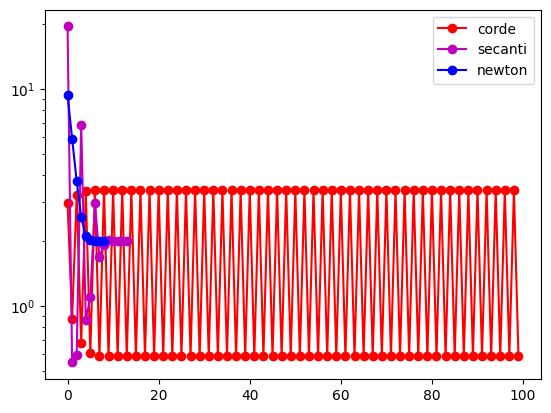

In [4]:
x = sym.symbols("x")

a1, b1 = (-1, 2)
f1_expr = x**3 - 6 * x**2 - 4 * x + 24
f1 = sym.lambdify(x, f1_expr, np)
df1 = sym.lambdify(x, sym.diff(f1_expr, x), np)

m = (f1(b1) - f1(a1)) / (b1 - a1)

s1, it1, _ = fun.corde(f1, m, -0.5)
s2, it2, _ = fun.secanti(f1, -0.3, -0.5)
s3, it3, _ = fun.newton(f1, df1, -0.5)

print("Solution corde: ", s1, "Iterates: ", len(it1))
print("Solution secanti: ", s2, "Iterates: ", len(it2))
print("Solution newton: ", s3, "Iterates: ", len(it3))

plt.semilogy(range(len(it1)), np.abs(np.array(it1)), "ro-")
plt.semilogy(range(len(it2)), np.abs(np.array(it2)), "mo-")
plt.semilogy(range(len(it3)), np.abs(np.array(it3)), "bo-")
plt.legend(["corde", "secanti", "newton"])
plt.show()

## Exercise 2: Roots of a Polynomial

Find the roots of the function $f(x)=x^4-9x^2+4x+12$ in the interval $[-4,4]$ using Newton's method, the chord method, and the secant method. Choose a suitable initial guess for each method.

8.00000000000000
Ordine Newton  0.9979287044634143
zero Newton  2.0000002138527395 iterazioni  24
zero secanti  2.00000025505053 iterazioni  34
Ordine Secanti  0.9969955212436895


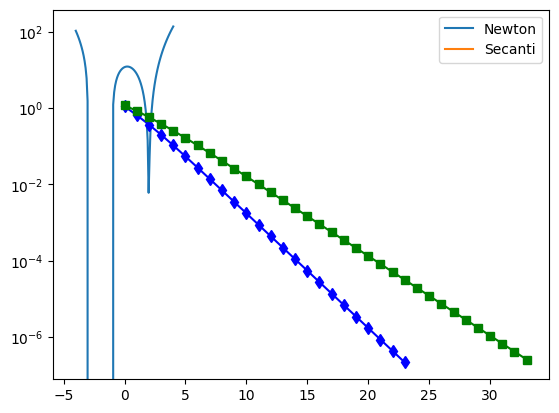

In [5]:
f1_s = x**4 - 9 * x**2 + 4 * x + 12
df1_s = sym.diff(f1_s, x, 1)
print(df1_s.subs(x, -2).evalf())
f1_numerica = lambdify(x, f1_s, np)
df1_numerica = lambdify(x, df1_s, np)
xx = np.linspace(-4, 4.0, 100)
plt.plot(xx, f1_numerica(xx), xx, np.zeros_like(xx))

x0 = 3.8
xm1 = 4.0
alfa = 2

x1n, xk_n, it_n = fun.newton(f1_numerica, df1_numerica, x0)
print("Ordine Newton ", fun.stima_ordine(xk_n, it_n))
print("zero Newton ", x1n, "iterazioni ", it_n)

x1_s, xk_s, it_s = fun.secanti(f1_numerica, xm1, x0)
print("zero secanti ", x1_s, "iterazioni ", it_s)
print("Ordine Secanti ", fun.stima_ordine(xk_s, it_s))

plt.semilogy(range(it_n), np.abs(np.array(xk_n) - alfa), "db-", range(it_s), np.abs(np.array(xk_s) - alfa), "gs-")
plt.legend(["Newton", "Secanti"])
plt.show()

# Newton-Raphson for Nonlinear Systems

Write a function `NewtonRaphson.py` that implements the Newton-Raphson method for solving a system of nonlinear equations. The function should take as input:
- fname: the vector function whose root is to be found
- JacName: the function that computes the Jacobian matrix
- X0: the initial guess vector
- tolx: tolerance for the increment test
- tolf: tolerance for the residual test
- NMAX: maximum number of iterations

The output should be the approximate root vector, a vector of relative errors between successive iterates, and the number of iterations performed.

Also implement two variants: `NewtonRaphson_Corde.py` (Chord method) and `NewtonRaphson_Sham.py` (Shamanskii method).


## Exercise 3: Nonlinear Systems

Solve the following five nonlinear systems using all three methods (Newton, Chord, Shamanskii). For each, plot the relative error between successive iterates on a logarithmic scale.

1. 
    2x0 - cos(x1) = 0
    sin(x0) + 2x1 = 0
2. 
    x0^2 + x1^2 - 4 = 0
    x0^2 - x1*2 - 1 = 0
3. 
    x0^2 + x1^2 - 2 = 0
    exp(x0-1) + x1^3 - 3 = 0
4. 
    4x0^2 + x1^2 - 4 = 0
    x0 + x1 - sin(x0-x1) = 0
5. 
    x0 + x1 - 3 = 0
    x0^2 + x1^2 - 9 = 0

To choose the initial guess X0, use a graphical method: plot the level curves z=0 of both functions and select an initial guess near an intersection point.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym


# Definizione variabili simboliche
x_sym, y_sym = sym.symbols("x_sym y_sym")

# Definizione funzioni simboliche usando variabili simboliche

f1_sym = lambda x_sym, y_sym: x_sym + y_sym - 3  # [-1,1]
f2_sym = lambda x_sym, y_sym: x_sym**2 + y_sym**2 - 9


def F_sym(f1_sym, f2_sym):
    return sym.Matrix([[f1_sym(x_sym, y_sym)], [f2_sym(x_sym, y_sym)]])


# Calcolo della matrice Jacobiana simbolicamente
J_sym = F_sym(f1_sym, f2_sym).jacobian(sym.Matrix([x_sym, y_sym]))

# Converte la matrice jacobiana Simbolica in una funzione che può essere valutata numericamente mediante lambdify
J_numerical = sym.lambdify([x_sym, y_sym], J_sym, np)

# Converte il vettore di funzioni Simbolico in una funzione che può essere valutata numericamente mediante lambdify
F_numerical = sym.lambdify([x_sym, y_sym], F_sym(f1_sym, f2_sym), np)

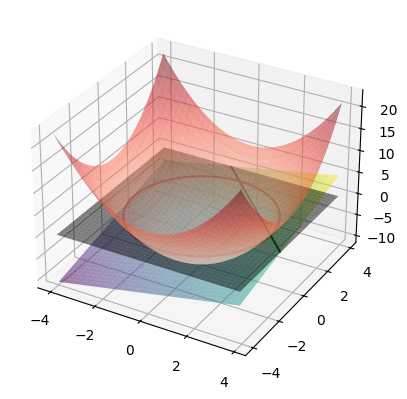

In [7]:
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
superfici = F_numerical(X, Y).squeeze()

# Plotta la superficie direttamente
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
# Plotta la superficie
ax.plot_surface(X, Y, superfici[0, :, :], cmap="viridis", alpha=0.5)
# Plotta la superficie
ax.plot_surface(X, Y, superfici[1, :, :], cmap="Reds", alpha=0.5)
ax.plot_surface(X, Y, Z, cmap="gray", alpha=0.5)
plt.contour(X, Y, superfici[0, :, :], levels=[0], colors="black")
plt.contour(X, Y, superfici[1, :, :], levels=[0], colors="red")

plt.show()

# Newton-Raphson for Optimization

Implement the Newton-Raphson method to find the minimum (absolute or relative) of a nonlinear function.

Find the minimum point of the following functions:
- $\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$
- $(x - 2)^4 + (x - 2)^2 y^2+(y+1)^2$
- $x^4+(x+y)^2y^2+(\exp(x)-1)^2$
- $100(y-x^2)^2+(1-x)^2$

 Soluzione Newton Raphson  [-7.13021499e-17  3.00000000e+00] Iterazioni  6
 Soluzione Newton Raphson Corde [-3.92574862e-13  3.00000000e+00] Iterazioni  42
 Soluzione Newton Raphson Sham  [-1.60808894e-16  3.00000000e+00] Iterazioni  11


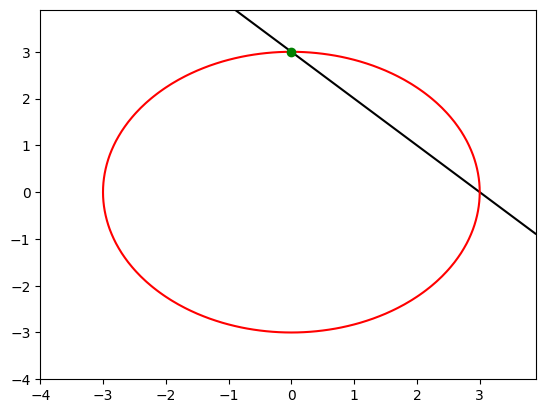

In [8]:
initial_guess = [-1,1]
Xs,errore,it = fun.newton_raphson(initial_guess,F_numerical, J_numerical)
print(" Soluzione Newton Raphson ",Xs, "Iterazioni ",it)

Xs_corde, errore_corde, itcorde = fun.newton_raphson_corde(initial_guess,F_numerical, J_numerical)
print(" Soluzione Newton Raphson Corde",Xs_corde, "Iterazioni ",itcorde)

step_update=5
Xs_sham, errore_sham, it_sham = fun.newton_raphson_sham(initial_guess,step_update,F_numerical, J_numerical)
print(" Soluzione Newton Raphson Sham ",Xs_sham, "Iterazioni ",it_sham)

plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')
plt.plot(Xs[0],Xs[1],'go')
plt.show()

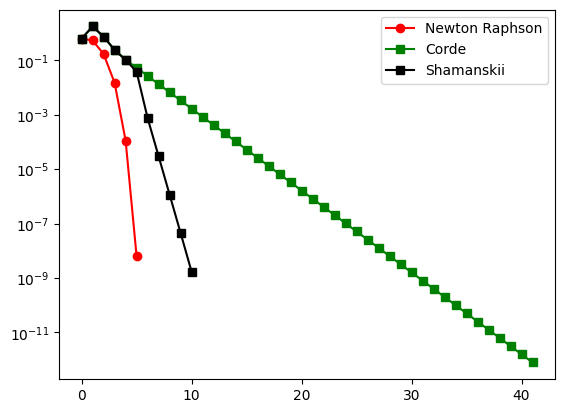

In [9]:
plt.semilogy(np.arange(it),errore,'ro-',np.arange(itcorde),errore_corde,'gs-',np.arange(it_sham),errore_sham,'ks-')
plt.legend(['Newton Raphson','Corde','Shamanskii'])
plt.show()